# Lista 6 - Dividir e Conquistar
##### Alunos: Ícaro Pires (15/0129815) e Vinicius Bernardo (15/0151331)¶ 

Nesta lista resolvemos o problema [Painting the Fence](http://codeforces.com/problemset/problem/448/c) do codeforces ilustrando as pinceladas necessárias para qualquer caso de teste (de tamanho viável) inserido pelo usuário

## Solução aceita do problema em C++

#include <bits/stdc++.h>

using namespace std;

vector<int> fence;

int solve(int l, int r, int h){
    if (l > r) return 0;

    int min_idx = min_element(fence.begin() + l, fence.begin() + r + 1) - fence.begin();

    int strokes_local  = fence[min_idx] - h;
    int strokes_l = solve(l, min_idx-1, fence[min_idx]);
    int strokes_r = solve(min_idx+1, r, fence[min_idx]);
    int strokes = strokes_local + strokes_r + strokes_l;

    int vertical_strokes = r - l + 1;

    return min(vertical_strokes, strokes);
}

int main(){
    ios_base::sync_with_stdio(false);
    int n; cin >> n;

    fence = vector<int>(n+1);
    for(int q = 1; q <= n; ++q)
        cin >> fence[q];

    cout <<  solve(1, n, 0) << endl;

    return 0;
}

## Solução alterada para recuperação das pinceladas

In [1]:
fence = [0]
enumerated_fence = []
commands = []
step = {}

def solve(l, r, h):
    global fence
    global commands
    global enumerated_fence

    if l > r:
        return 0

    min_idx = min(enumerated_fence[l:r+1], key=lambda p: p[1])[0]

    h_strokes_l = solve(l, min_idx - 1, fence[min_idx])
    h_strokes_r = solve(min_idx + 1, r, fence[min_idx])
    h_strokes_local = fence[min_idx] - h

    h_strokes = h_strokes_local + h_strokes_l + h_strokes_r
    v_strokes = r - l + 1

    if v_strokes <= h_strokes:
        step[(l, r, h)] = 'vertical'
        return v_strokes
    else:
        step[(l, r, h)] = 'horizontal'
        return h_strokes

def reconstruct(l, r, h):
    global fence
    global commands
    global enumerated_fence

    if l > r:
        return

    min_idx = min(enumerated_fence[l:r+1], key=lambda p: p[1])[0]

    cur_step = step[(l, r, h)]
    if cur_step == 'vertical':
        for number in range(l, r + 1):
            commands += [{'type_command': 'vertical', 'number': number-1}]
    else:
        for number in range(h + 1, fence[min_idx] + 1):
            commands += [{'type_command': 'horizontal', 'number': number-1, 'begin': l-1, 'end': r-1}]

        reconstruct(l, min_idx - 1, fence[min_idx])
        reconstruct(min_idx + 1, r, fence[min_idx])

## Chamada da solução e definição dos inputs

In [2]:
n = int(input())
fence += [int(x) for x in input().split()]
enumerated_fence = list(enumerate(fence))

print('Mínimo de movimentos:', solve(1, n, 0))
reconstruct(1, n, 0)

40
2 3 5 1 1 3 4 5 2 8 10 5 6 4 6 9 8 3 5 4 5 5 5 5 8 10 12 6 1 1 2 3 4 5 6 7 8 9 10 11
Mínimo de movimentos: 34


### Definição das funções de plotagem

In [3]:
import matplotlib.pyplot as plt

fence = fence[1:]

nrows, ncols = max(fence), len(fence)

def update_image(image):
    row_labels = range(nrows, 0, -1)
    col_labels = range(1, ncols+1)
    plt.matshow(image)
    plt.xticks(range(ncols), col_labels)
    plt.yticks(range(nrows), row_labels)
    plt.show()

In [4]:
def build_fence(list_height_boards):
    for counter, height in enumerate(list_height_boards):
        image[(nrows-height):nrows, counter] = 0.5

In [5]:
def execute_commands(type_command, img_target, number, begin=0, end=ncols):
    if type_command == 'vertical':
        img_target[:, number] = img_target[:, number] > 0
        print("Pintando na vertical no índice {}".format(number))

    elif type_command == 'horizontal':
        img_target[nrows - number - 1, begin:end] = img_target[nrows - number - 1, begin:end] > 0
        print("Pintando na horizontal no índice {}, da coluna {} até {}".format(number, begin, end))

    else:
        raise ValueError('Invalid type command')

    return img_target

### Ilustração da cerca pintada

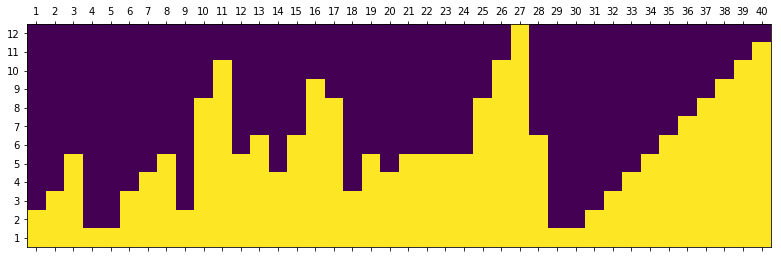

In [6]:
import numpy as np

image = np.zeros(nrows*ncols)

image = image.reshape((nrows, ncols))

build_fence(fence)
update_image(image)

### Pintura passo a passo

Pintando na horizontal no índice 0, da coluna 0 até 40


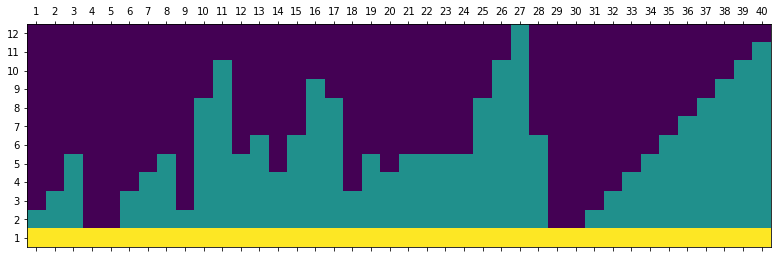

Pintando na vertical no índice 0


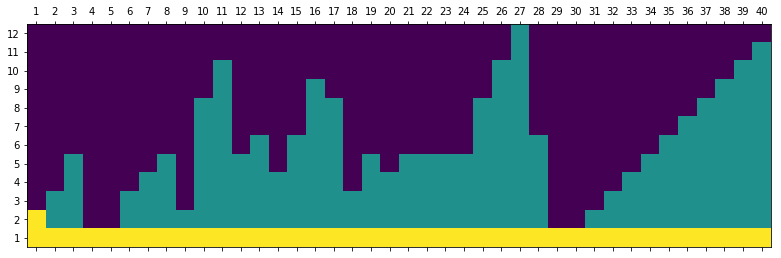

Pintando na vertical no índice 1


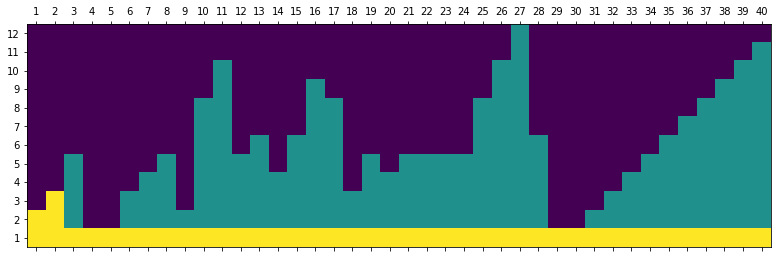

Pintando na vertical no índice 2


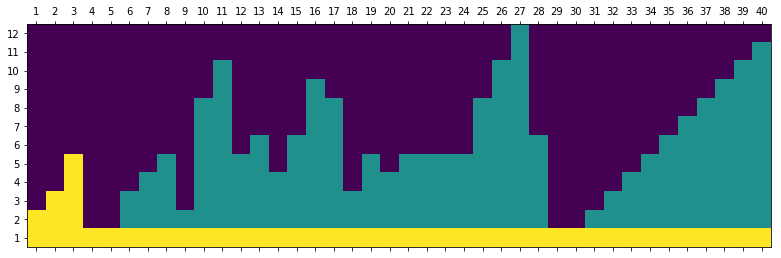

Pintando na horizontal no índice 1, da coluna 5 até 28


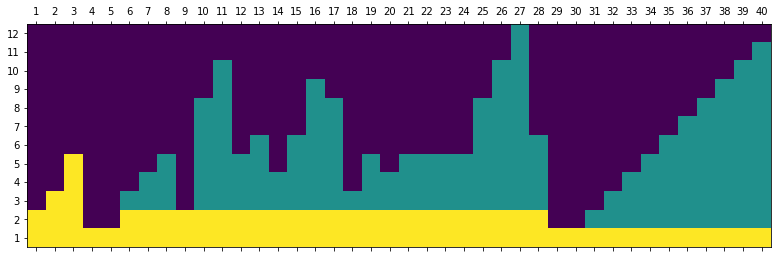

Pintando na vertical no índice 5


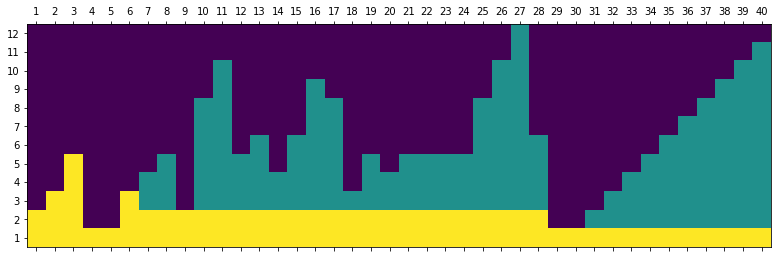

Pintando na vertical no índice 6


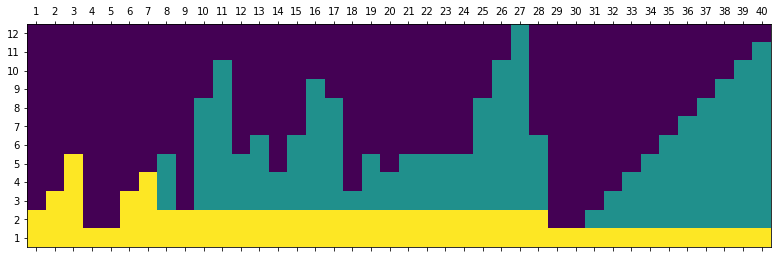

Pintando na vertical no índice 7


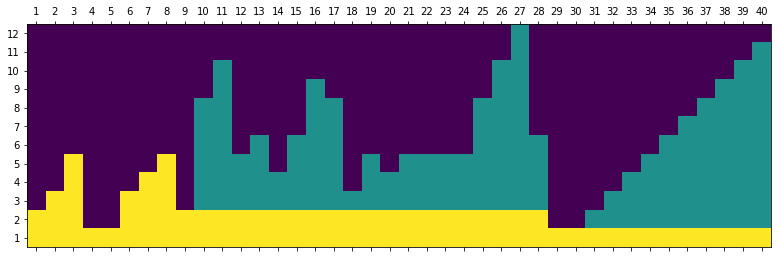

Pintando na horizontal no índice 2, da coluna 9 até 28


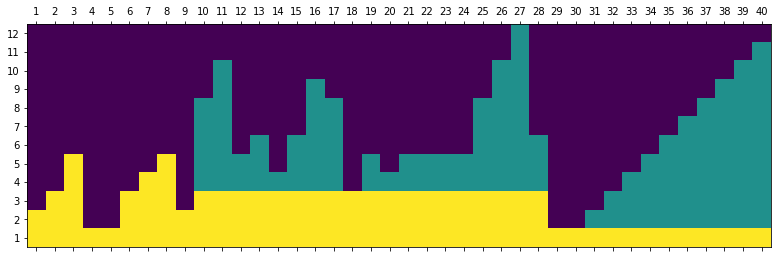

Pintando na vertical no índice 9


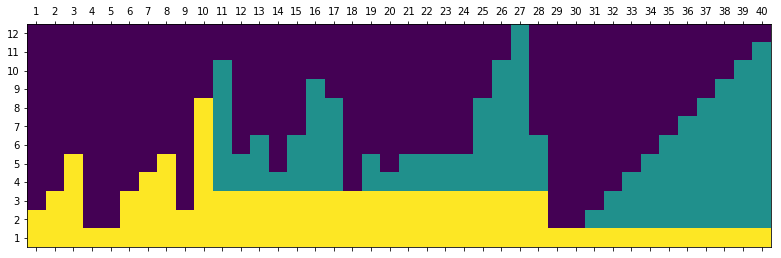

Pintando na vertical no índice 10


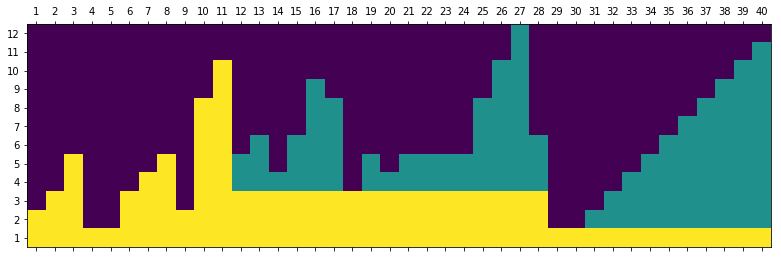

Pintando na vertical no índice 11


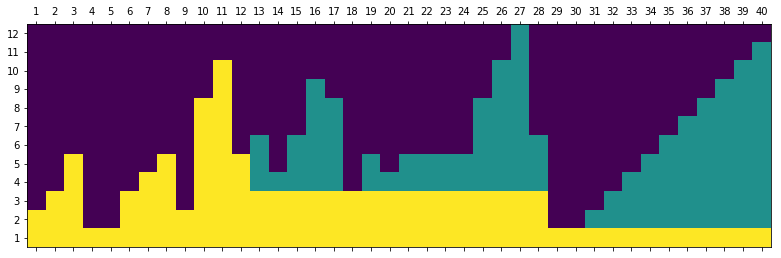

Pintando na vertical no índice 12


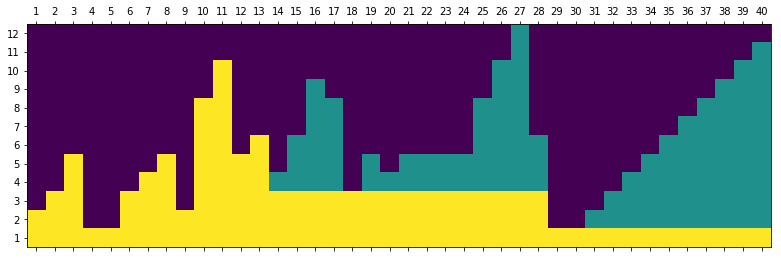

Pintando na vertical no índice 13


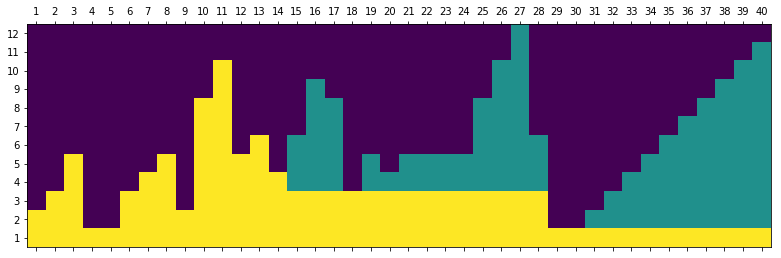

Pintando na vertical no índice 14


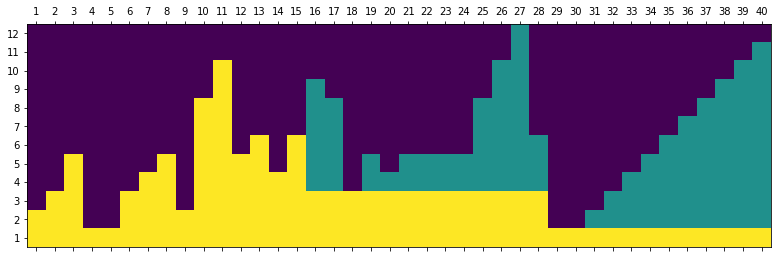

Pintando na vertical no índice 15


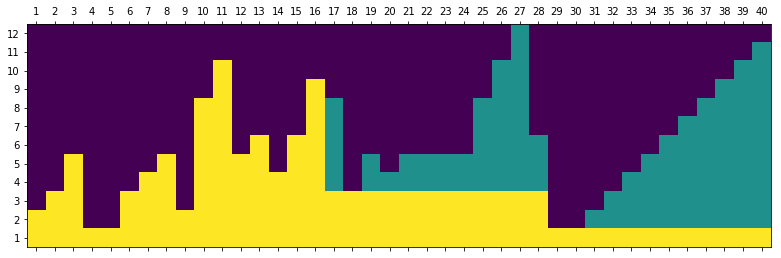

Pintando na vertical no índice 16


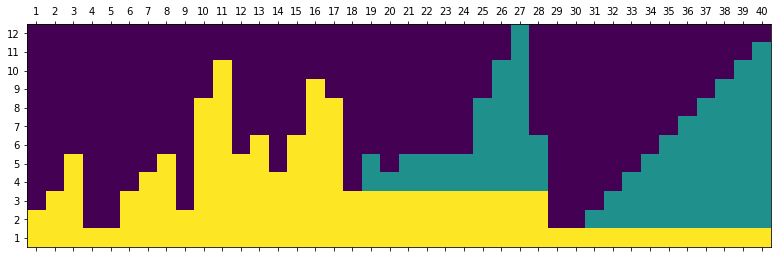

Pintando na horizontal no índice 3, da coluna 18 até 28


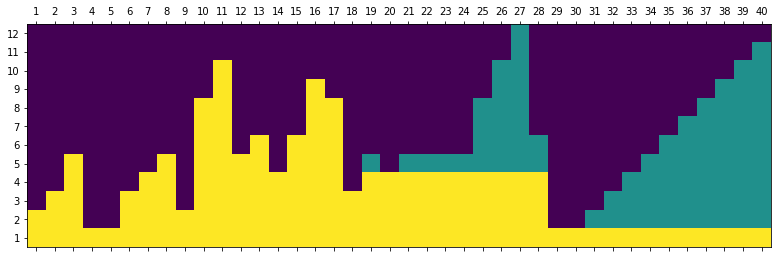

Pintando na vertical no índice 18


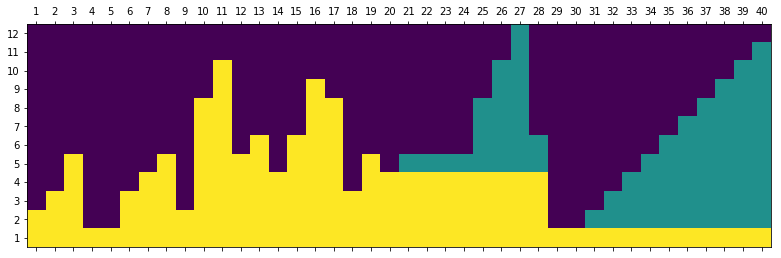

Pintando na horizontal no índice 4, da coluna 20 até 28


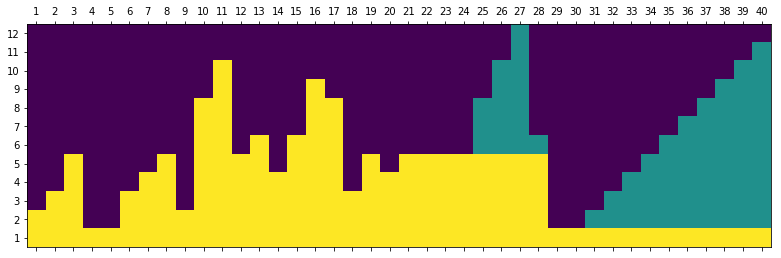

Pintando na vertical no índice 24


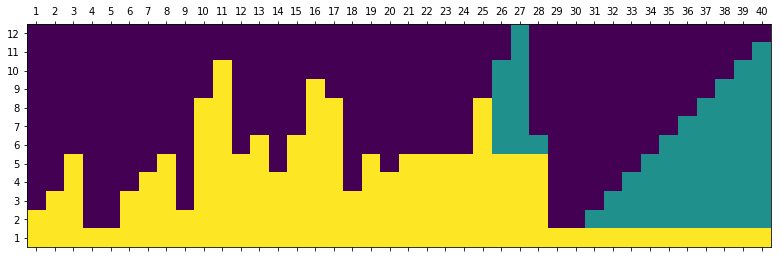

Pintando na vertical no índice 25


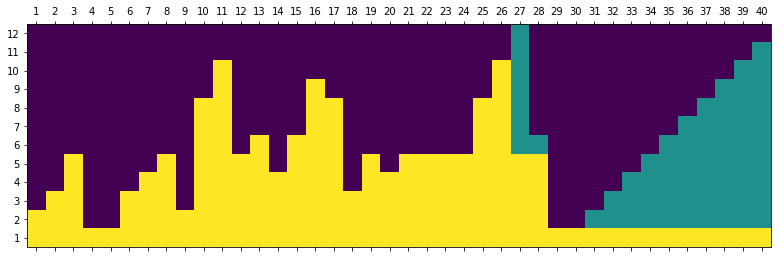

Pintando na vertical no índice 26


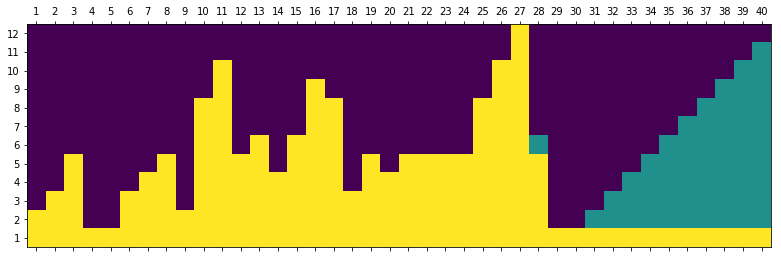

Pintando na vertical no índice 27


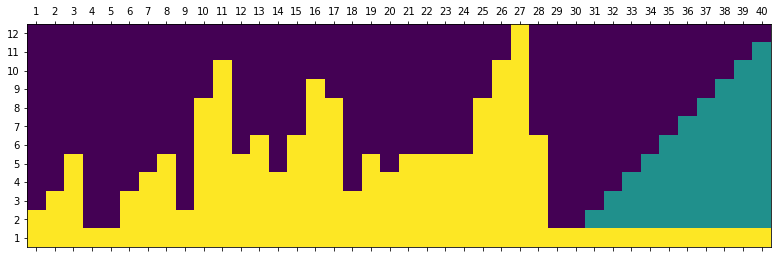

Pintando na vertical no índice 30


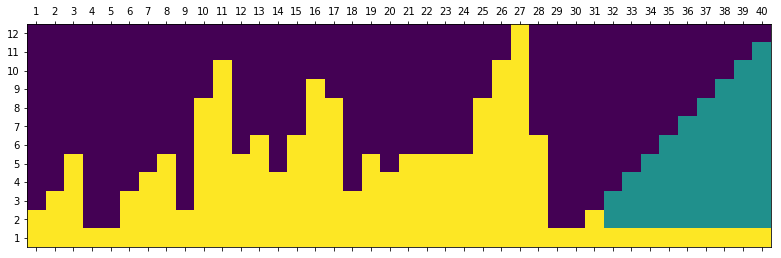

Pintando na vertical no índice 31


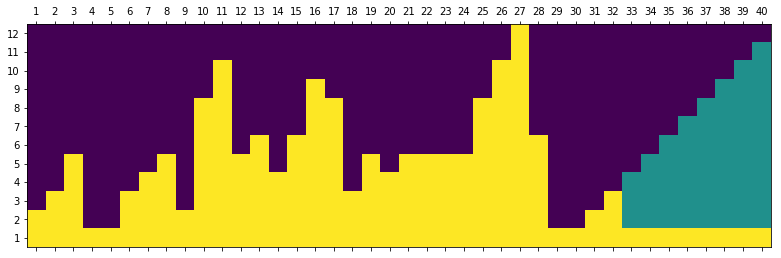

Pintando na vertical no índice 32


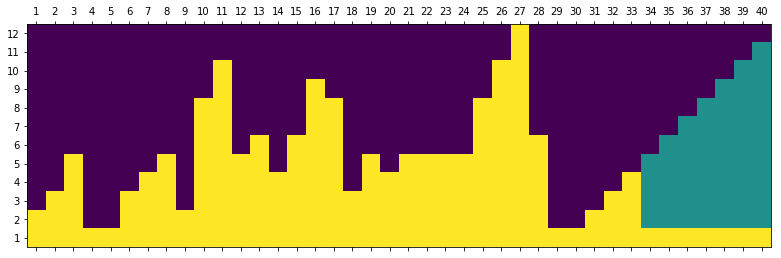

Pintando na vertical no índice 33


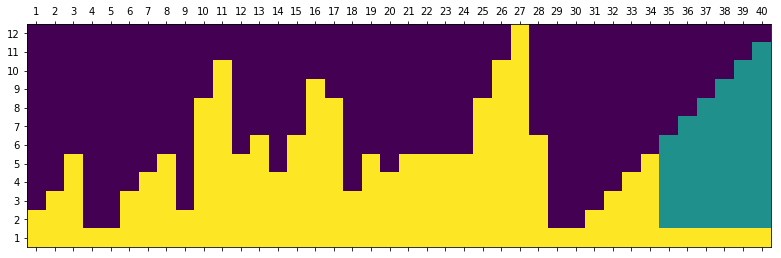

Pintando na vertical no índice 34


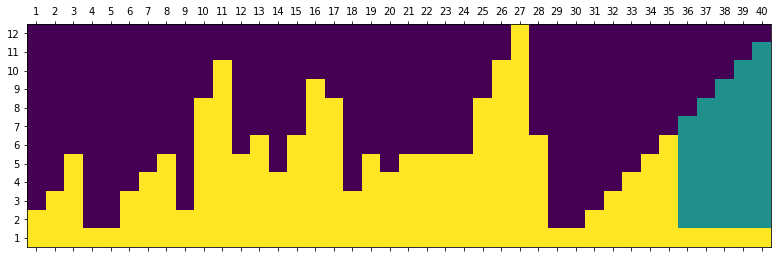

Pintando na vertical no índice 35


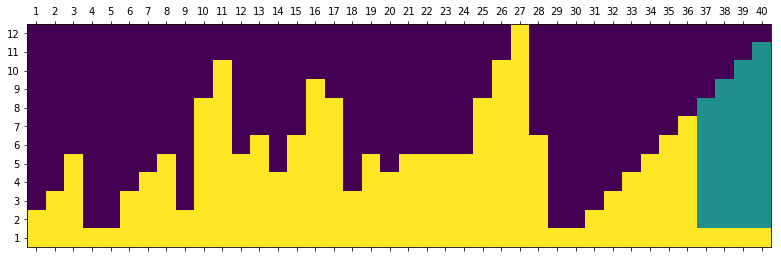

Pintando na vertical no índice 36


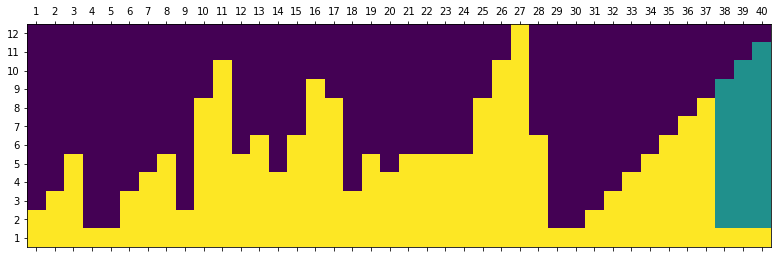

Pintando na vertical no índice 37


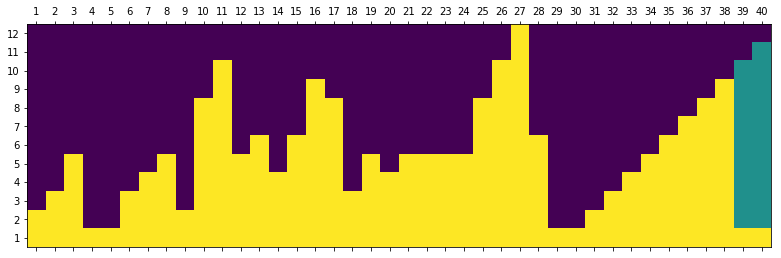

Pintando na vertical no índice 38


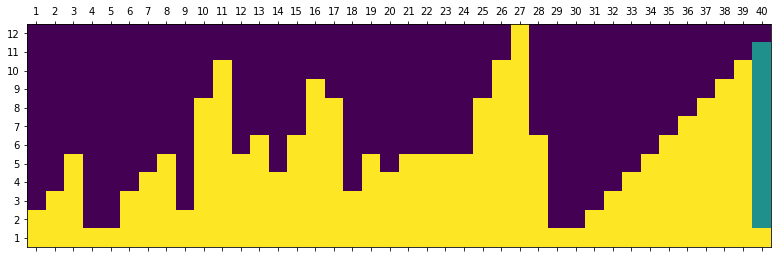

Pintando na vertical no índice 39


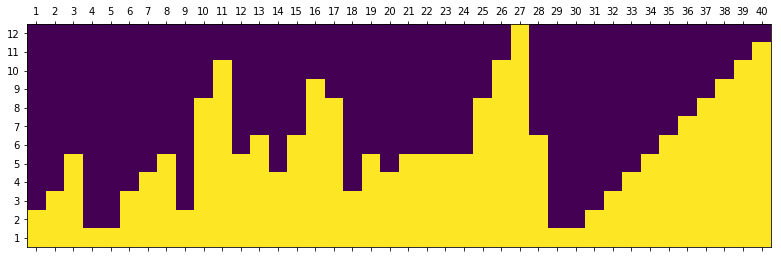

In [7]:
for command in commands:
    
    image = execute_commands(
        command['type_command'],
        image,
        command['number'],
        command.get('begin', 0),
        command.get('end', ncols)+1
    )
    update_image(image)